## Chapter 2. Integration with NMF🦅 (Non-negative Matrix Factorization)
In Chapter 1 Data Loading and Preprocessin, we have learned how to read multi-omics datasets using pandas🐼🐼in Python, handle missing values, and integrate them into a simple matrix. 

In  Chapter2, you will learn how to use NMF (Non-negative Matrix Factorization) to decompose matrices and extract latent features from the **CNV (Copy Number Variation)** dataset.
NMF is a extension of PCA
##### **If** you have learnt [🦅2.1.1 What is NMF ](#🦅2.1.1-What-is-NMF ) and [🦅2.1.2 How to implement NMF in Python](#🦅2.1.2-How-to-implement-NMF-in-Python), 
#####    ⚡⚡⚡       you can start to practice in [🦅2.3 NMF Implementation Exercise](#🦅2.3-NMF-Implementation-Exercise)


## 
## 2.1 Basics 

## 🦅2.1.1 What is NMF 
## NMF: Non-negative Matrix Factorization) 

##### NMF Formula : NMF decomposes a non-negative matrix $V$ into two non-negative matrices $ W $and $H$

##  <span style="color:Purple">$$ V \approx WH $$  </span>
##  <span style="color:Purple">$$ V_{m \times n} \approx W_{m \times k}H_{k \times n} $$
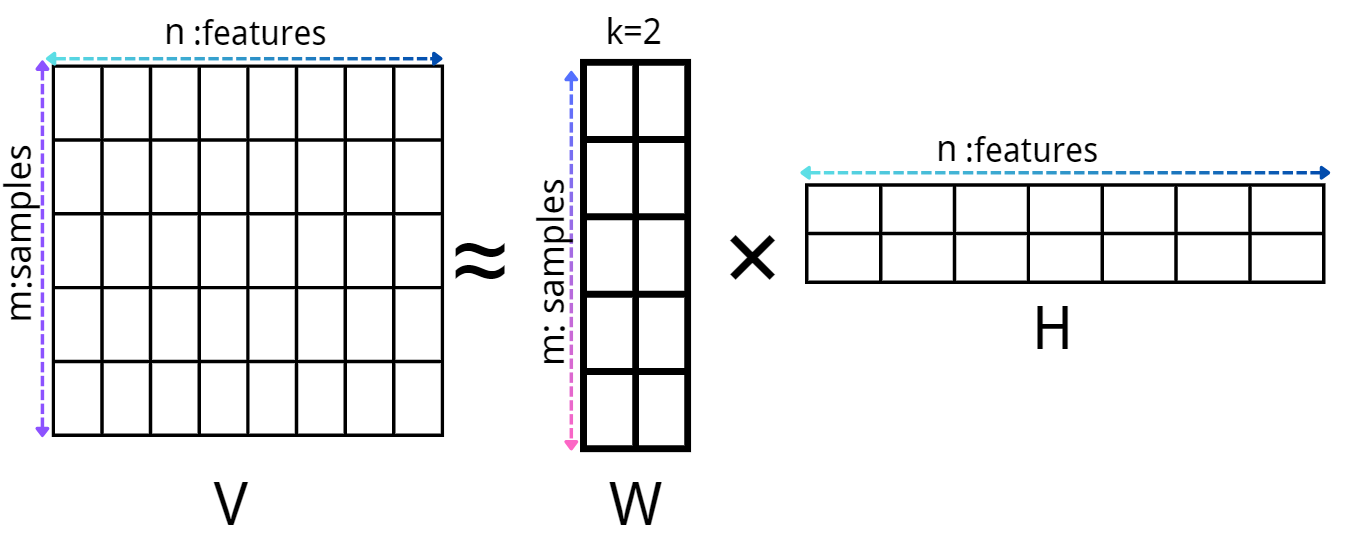 
##### where:
   
-  **V**  is the <u>**original non-negative matrix ** </u>$ V_{m \times n} $.
    **$ m $**   represents the number of samples.
    **$ n $**  represents the number of features.


-  **W**  is the basis matrix $ W_{m \times k} $.

-  **H** is the coefficient matrix **k** is the number of latent features, <span style="color:Purple">$ H_{k \times n}( k \ll \min(m, n) )$.






 The **Frobenius norm** is defined as:</span>

$$ \| A \|_F = \sqrt{\sum_{i,j} a_{ij}^2} $$</span>

The objective is to minimize the **reconstruction error**, often measured using the **Frobenius norm**:</span>

$$ \min_{W, H} \| V - WH \|_F $$</span>


##  


## 🦅2.1.2 How to implement NMF in Python


##  🎬Example
Here, we construct the matrix and dataframe for $ V_{m \times n} $ as <u>the originalnon-negative matrix($ V \approx WH $)</u> using the `numpy` and `pandas` package.
- `numpy` generates a numerical marix which only has the numbers. 
- `pandas` assigsn column and row names to $V$ and convert it into a DataFrame
- `np.random.randn()`generates data from a **standard normal distribution**$N(0, 1) $, which means the data has been **normalized**.

```python
import numpy as np
np.random.seed(0)
V = np.abs(np.random.randn(10, 5))

import pandas as pd
df_V = pd.DataFrame(V, columns=[f"Sample{i+1}" for i in range(5)], index=[f"Gene{i+1}" for i in range(10)])
df_V
```
  ❓Question:  In this $ V_{m \times n}$ below, $m $= ?, $n$=? (**$ m $** : the number of samples.**$ n $** : the number of features.)






##### ▶️ Run the code below to see the data `df_V` and answer the❓ Question

In [34]:
import numpy as np
np.random.seed(0)
V = np.abs(np.random.randn(10, 5))

import pandas as pd
df_V = pd.DataFrame(V, columns=[f"Sample{i+1}" for i in range(5)], index=[f"Gene{i+1}" for i in range(10)])
df_V

,Sample1,Sample2,Sample3,Sample4,Sample5
Gene1,1.764052,0.400157,0.978738,2.240893,1.867558
Gene2,0.977278,0.950088,0.151357,0.103219,0.410599
Gene3,0.144044,1.454274,0.761038,0.121675,0.443863
Gene4,0.333674,1.494079,0.205158,0.313068,0.854096
Gene5,2.552990,0.653619,0.864436,0.742165,2.269755
Gene6,1.454366,0.045759,0.187184,1.532779,1.469359
Gene7,0.154947,0.378163,0.887786,1.980796,0.347912
Gene8,0.156349,1.230291,1.202380,0.387327,0.302303
Gene9,1.048553,1.420018,1.706270,1.950775,0.509652
Gene10,0.438074,1.252795,0.777490,1.613898,0.212740


## 🎬 Step1 Construct an NMF model
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

Fisrt we should import `NMF` 🦅function from the `sklearn` package
```python
from sklearn.decomposition import NMF
```
Next we will use the `NMF`🦅 fuction to construct the NMF model:
```python
 NMF(n_component= ,init=' ', random_date= )
```
- `n_components=2` means we can reduce the data to 2 features.

-  `init`Determines the initialization method for the NMF algorithm.
  `init='random'` initializes the matrices with random values.
 
-  `random_state` Controls the seed of the random number generator for reproducibility.
 `random_state=0` ensures that the random initialization produces the same result every time you run the code.

##### Example code📋 
```python
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=2, init='random', random_state=0)
nmf_model
```
##### ▶️ Run the code below to construct a NMF model

In [35]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=2, init='random', random_state=0)
nmf_model

NMF(init='random', n_components=2, random_state=0)

## 🎬 Step2 Calculate the W and H
From the W matrix, we can observe the similarity of each sample in the new feature space, which is useful for subtypes classification.
we can use `.fit_transform()` in` NMF `function to calculate $W$ :
```python
W = [model name].fit_transform([Numerical Matrix ])
```


⚠️**Note: The input to fit_transform must be a <u>[ Numerical Matrix.]</u>**
##### Example code📋 
```python
W = nmf_model.fit_transform(V)
W

```
##### ▶️ Run the code below to see W

In [86]:
#W

From the 
𝐻
H matrix, we can observe the contribution of each original feature to the new components, which helps in understanding the underlying structure of the data and identifying key features.

We can use `components_` in the NMF function to calculate $𝐻$
##### Example code📋 
```python
W = nmf_model.fit_transform(V)
W

H = nmf_model.components_
H
```
##### ▶️ Run the code below to see the H

In [ ]:
#H

## 🎬 Step 3 construct a dataframe for W and H

##### Example code📋 
The obtained $W$ is a numerical matrix.  To make the matrix accessible for integration with other datasets, it is necessary to convert $W$ into a DataFrame format.

- `index=[data frame].index`:This is to ensure that the data is aligned with the column names of the data frame.
- `columns=['Component1','Component2']`:This is to add column names to the two principal components. 


##### Example code📋 
```python
df_W = pd.DataFrame(W, index=df_V.index, columns=['Component1','Component2'])
df_W
```
##### ▶️ Run the code below to see the dataframe $W$

You can also check the fisrt 5 components:
```python
top_5_component1 = df_W.nlargest(5, 'Component1')
top_5_component1
```

In [54]:
top_5_component1 = df_W.nlargest(5, 'Component1')
top_5_component1

,Component1,Component2
Gene5,1.491032,0.000000
Gene1,1.308877,0.624713
Gene6,1.053014,0.034540
Gene9,0.561686,1.751186
Gene2,0.360002,0.332993


## 2.2 Visualization 


##  


## 🦅2.3 NMF Implementation Exercise 
Use the data below to conduct a NMF analysis
```python
base_url = "https://raw.githubusercontent.com/WanbingZeng/OMINEX/main/data/"
x1 = pd.read_csv(base_url + "COREAD_gex.csv", index_col=0).T
x2 = pd.read_csv(base_url + "COREAD_mu.csv", index_col=0).T
x3 = pd.read_csv(base_url + "COREAD_cn.csv", index_col=0).T
covariates = pd.read_csv(base_url+"COREAD_subtypes.csv", index_col=0, header=0)
covariates=covariates['subtypes']
```
##### ▶️ construct a NMF model  using `x1`, `x2`, `x3` and visualize
##### If you have any problems, check[🎬 Step1 Construct an NMF model](#🎬-Step1-Construct-an-NMF-model)
(In this case, the data of CNV has been normalised.)

### Note: Considerations for Integrating Multi-Omics Data into NMF

When integrating multi-omics data into Non-negative Matrix Factorization (NMF), there are several important considerations to ensure meaningful and accurate results:

1. **Data Preprocessing**:
    - **Normalization**: Normalize each dataset to make them comparable. Choose techniques like z-score normalization or min-max scaling.
    - **Handling Missing Data**: Impute missing values appropriately to avoid introducing biases in the analysis.

2. **Feature Selection**:
    - **Dimensionality Reduction**: Apply dimensionality reduction techniques such as PCA or feature selection methods to reduce the complexity and noise in the data before applying NMF.
    - **Biological Relevance**: Select features that are biologically relevant to the study to improve interpretability.

3. **Data Integration**:
    - **Concatenation vs. Fusion**: Decide whether to concatenate the datasets along the feature dimension or to use a data fusion method. Concatenation is straightforward but may require careful scaling to balance different datasets.
    - **Scaling Across Datasets**: Ensure that the scales of different omics datasets are compatible. This might involve additional normalization steps.

4. **NMF Implementation**:
    - **Component Selection**: Choose the number of components (k) appropriately. This can be done using cross-validation or other model selection criteria.
    - **Initialization**: Use different initialization methods (e.g., random, NNDSVD) and check for consistency in the results to avoid local minima.

5. **Post-NMF Analysis**:
    - **Component Interpretation**: Analyze the resulting components to interpret the biological significance of each component.
    - **Clustering and Annotation**: Use clustering techniques to identify groups of samples with similar component profiles and annotate them with known biological labels.

By carefully considering these aspects, you can effectively integrate multi-omics data into NMF and gain valuable insights from the resulting components.



## 🔑

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
base_url = "https://raw.githubusercontent.com/WanbingZeng/OMINEX/main/data/"
x1 = pd.read_csv(base_url + "COREAD_gex.csv", index_col=0).T
x2 = pd.read_csv(base_url + "COREAD_mu.csv", index_col=0).T
x3 = pd.read_csv(base_url + "COREAD_cn.csv", index_col=0).T
covariates = pd.read_csv(base_url+"COREAD_subtypes.csv", index_col=0, header=0)
def split_neg_pos(df):
    df_pos = df.clip(lower=0)
    df_neg = (-df.clip(upper=0)).rename(lambda x: x+'_neg', axis=1)
    return pd.concat([df_pos, df_neg], axis=1)
x1_normalized = split_neg_pos(x1_standardized)
encoder_x2 = OneHotEncoder()# x2: one-hotecncoder
x2_encoded = encoder_x2.fit_transform(x2).toarray()
x2_normalized = pd.DataFrame(x2_encoded, index=x2.index, columns=encoder_x2.get_feature_names_out(x2.columns))

In [63]:
combined_data = pd.concat([x1_split, x2_encoded_df, x3], axis=1)
nmf_model = NMF(n_components=2, init='random', random_state=0)
W = nmf_model.fit_transform(combined_data.values)
H = nmf_model.components_
components_df = pd.DataFrame(H.T, index=combined_data.columns, columns=['Component1', 'Component2'])
components_df

,Component1,Component2
RNF113A,0.332568,0.607581
S100A13,0.413468,0.580660
AP3D1,0.457588,0.495016
ATP6V1G1,0.321070,0.622958
UBQLN4,0.356927,0.619097
...,...,...
7q32.1,0.441104,0.247898
17p11.2,0.332536,0.234667
15q11.1,0.299589,0.153621
15q11.2,0.299589,0.153621


## 📐Scatter Plot of NMF Components

In [67]:

from sklearn.decomposition import NMF
import plotly.express as px
# Add source information
components_df['Source'] = [col.split('_')[0] for col in components_df.index]

# Create a scatter plot using Plotly
fig = px.scatter(
    components_df, 
    x='Component1', 
    y='Component2', 
    color='Source',
    title='Scatter Plot of NMF Components',
    labels={'Component1': 'Component 1', 'Component2': 'Component 2'},
    hover_name=components_df.index
)

# Show the plot
fig.show()

C:\Users\zhanglingling\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



##### 📝Interpretation
The scatter plot displays the relationship between two NMF components for various genomic regions, such as 15q14 and 7q36.2. The x-axis represents Component 1, and the y-axis represents Component 2. Each point corresponds to a genomic region, with different colors indicating different regions. The plot reveals how these regions cluster or spread based on their NMF component values, highlighting patterns and potential groupings within the genomic data.







## 📐Scatter Plot of NMF Components with Subtypes

In [77]:
#Scatter Plot of NMF Components with Subtypes
W_df = pd.DataFrame(W, index=combined_data.index, columns=[f'Component{i+1}' for i in range(W.shape[1])])
merged_w_covariates=pd.concat([W_df,covariates],axis=1)
merged_w_covariates
import plotly.express as px

fig = px.scatter(
    merged_w_covariates, 
    x='Component1', 
    y='Component2', 
    color='subtypes', 
    title='Scatter Plot of NMF Components with Subtypes',

)

fig.show()

C:\Users\zhanglingling\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



##### 📝Interpretation


The scatter plot displays the two components derived from Non-negative Matrix Factorization (NMF) for a set of cases (samples). The x-axis represents Component1, and the y-axis represents Component2. Each point in the plot corresponds to a case, with colors indicating different subtypes (CMS1 and CMS3).

##### Key Observations

###### Component Distribution

- The majority of the points are clustered near the lower values of Component1, indicating that many cases have similar characteristics in terms of Component1.
- Component2 shows a wider spread, suggesting more variability among the cases.

###### Subtype Separation

- CMS1 cases are colored blue, while CMS3 cases are colored red.
- There is an observable pattern where CMS1 and CMS3 cases are interspersed among each other. However, some regions show a higher concentration of one subtype over the other.

###### Clustering

- Certain clusters of points can be observed, indicating that specific groups of cases have similar characteristics in both components.


## 📐Hierarchical Clustering of NMF Components with Subtypes

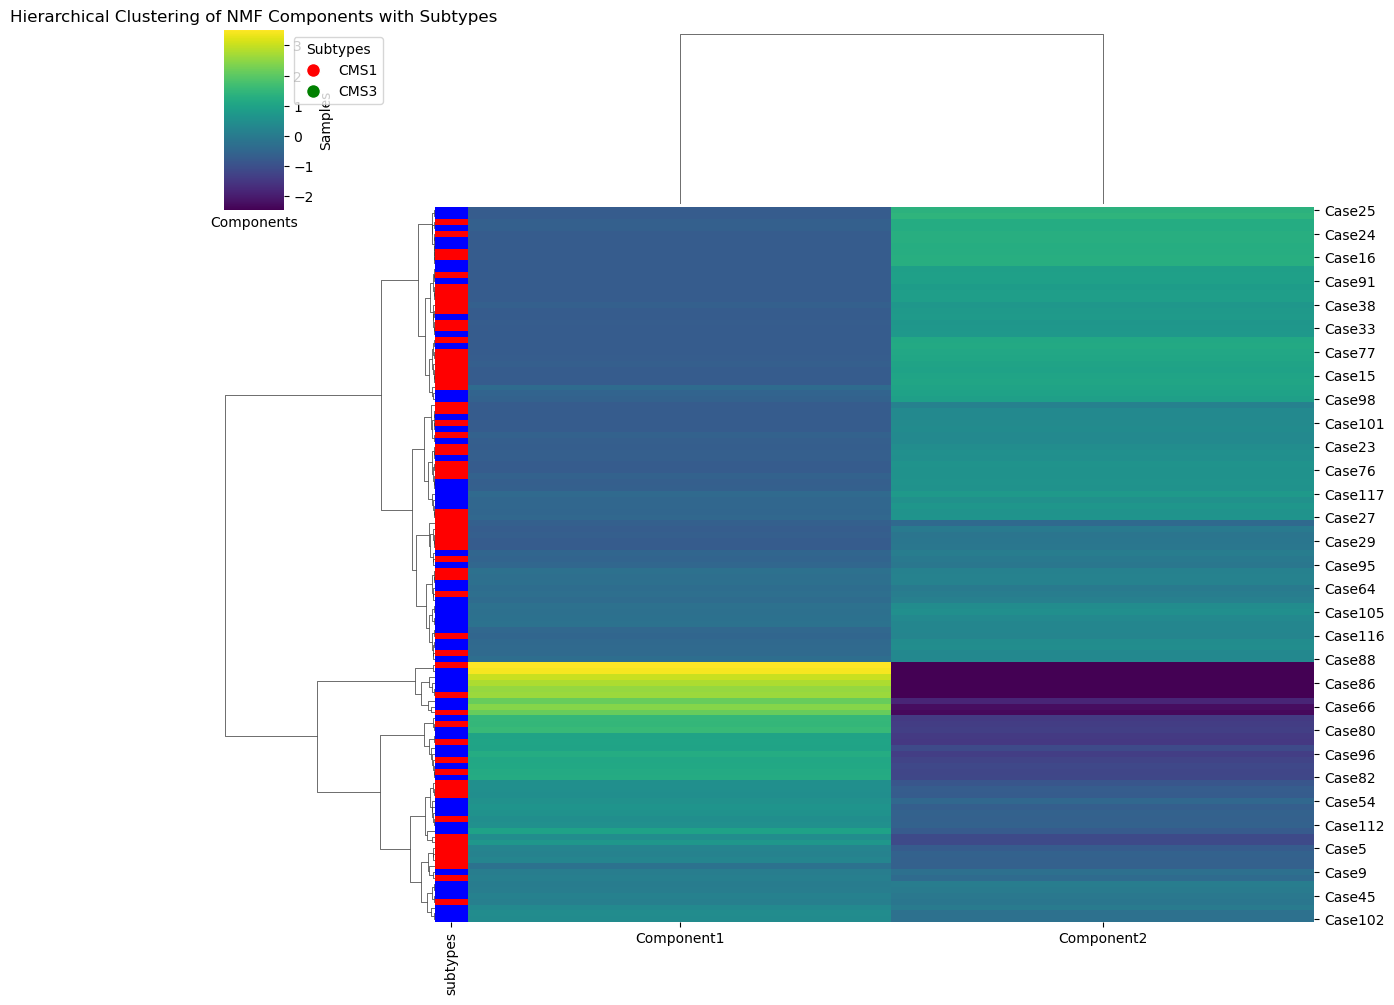

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import StandardScaler

subtype_colors = covariates.loc[W_df.index, 'subtypes'].map({'CMS1': 'red', 'CMS2': 'green', 'CMS3': 'blue'})
# Perform scaling for better visualization
scaler = StandardScaler()
W_df_scaled = pd.DataFrame(scaler.fit_transform(W_df), index=W_df.index, columns=W_df.columns)

# Perform hierarchical clustering
row_clusters = linkage(W_df_scaled, method='ward', metric='euclidean')
col_clusters = linkage(W_df_scaled.T, method='ward', metric='euclidean')

# Create the clustermap with row_colors for subtypes
g = sns.clustermap(
    W_df_scaled, 
    row_linkage=row_clusters, 
    col_linkage=col_clusters, 
    row_colors=subtype_colors, 
    cmap='viridis', 
    figsize=(12, 10),
    cbar_kws={'label': 'NMF Component Value'},
    annot=False
)
# Add titles and labels
plt.title('Hierarchical Clustering of NMF Components with Subtypes')
plt.xlabel('Components')
plt.ylabel('Samples')
# Add custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in ['red', 'green', 'blue']]
labels = ['CMS1', 'CMS3']
plt.legend(handles, labels, title='Subtypes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##### 📝Interpretation


The heatmap shown in the figure represents the hierarchical clustering of Non-negative Matrix Factorization (NMF) components for a set of cases (samples). The heatmap includes both component values and annotations for sample subtypes (CMS1 and CMS3).This heatmap provides a comprehensive view of the NMF components and their relationship to sample subtypes. By combining hierarchical clustering and subtype annotations, it allows for a detailed analysis of the data, highlighting patterns and similarities that may be important for further research or clinical applications.


###### Component1 and Component2
- The heatmap shows the values of Component1 and Component2 for each case. The distribution of colors indicates how each case is represented by these components.
- Cases with similar NMF component values are grouped together, making it easier to identify patterns and similarities among the cases.

###### Subtype Patterns
- The color bars indicate that there are regions where CMS1 (red) and CMS3 (blue) subtypes are more concentrated, suggesting potential subtype-specific patterns in the NMF components.
- For example, certain clusters may predominantly consist of CMS1 cases, while others are a mix of CMS1 and CMS3.

###### Clustering Insights
- The hierarchical clustering dendrograms show the relationships between samples and components. The closer the branches, the more similar the samples or components are to each other.
- This clustering can provide insights into the underlying structure of the data, potentially revealing distinct groups or clusters within the dataset.


## 2.2 iNMF